In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


In [6]:
#Combine the data into a single dataset by merging clinical_data and mouse_data
Combine = pd.merge(clinical_data, mouse_data,on ="Mouse ID",how='inner')

In [17]:
#Combine the data into a single dataset by merging clinical_data and mouse_data
Combine = pd.merge(clinical_data, mouse_data,how='outer', on='Mouse ID')

In [13]:
Combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [20]:
Combine.sort_values(["Timepoint"], ascending = True).style.format({"	Tumor Volume (mm3)":"{:.2f}"})


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45,0,Capomulin
1535,i635,0,45,0,Propriva
565,g791,0,45,0,Ramicane
1545,w746,0,45,0,Propriva
1547,r107,0,45,0,Propriva
555,i177,0,45,0,Ramicane
545,a644,0,45,0,Ramicane
1554,s187,0,45,0,Propriva
535,r811,0,45,0,Ramicane
1561,g570,0,45,0,Propriva


In [58]:
#Tumor Response to Treatment
#convert into datadrame
clinical_data = clinical_data.drop(clinical_data.loc[clinical_data['Mouse ID']=='g989'].index)
mouse_data = mouse_data.drop(mouse_data.loc[mouse_data['Mouse ID']=='g989'].index)
dataframe = pd.merge(clinical_data, mouse_data, on='Mouse ID', how='inner')
dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [173]:
#we only want drug,timepoint and tumor volume(mean)
New_tumor = dataframe.groupby(['Drug', 'Timepoint'])
Tumor = pd.DataFrame()
Tumor['Timepoint'] = New_tumor['Timepoint'].sem()
Tumor['Tumor Volume (mm3)'] = New_tumor['Tumor Volume (mm3)'].mean()
Tumor.index.name = True
Tumor.head(100)


Timepoint  Tumor Volume (mm3)
Drug      Timepoint                               
Capomulin 0                0.0           45.000000
          5                0.0           44.266086
          10               0.0           43.084291
          15               0.0           42.064317
          20               0.0           40.716325
          25               0.0           39.939528
          30               0.0           38.769339
          35               0.0           37.816839
          40               0.0           36.958001
          45               0.0           36.236114
Ceftamin  0                0.0           45.000000
          5                0.0           46.503051
          10               0.0           48.285125
          15               0.0           50.094055
          20               0.0           52.157049
          25               0.0           54.287674
          30               0.0           56.769517
          35               0.0           58.827548
          40               0.0           61.467895
          45               0.0           64.132421
Infubinol 0                0.0           45.000000
          5                0.0           47.062001
          10               0.0           49.403909
          15               0.0           51.296397
          20               0.0           53.197691
          25               0.0           55.715252
          30               0.0           58.299397
          35               0.0           60.742461
          40               0.0           63.162824
          45               0.0           65.755562
...                        ...                 ...
Ramicane  0                0.0           45.000000
          5                0.0           43.944859
          10               0.0           42.531957
          15               0.0           41.495061
          20               0.0           40.238325
          25               0.0           38.974300
          30               0.0           38.703137
          35               0.0           37.451996
          40               0.0           36.574081
          45               0.0           34.955595
Stelasyn  0                0.0           45.000000
          5                0.0           47.470830
          10               0.0           49.335368
          15               0.0           51.448025
          20               0.0           53.970080
          25               0.0           56.172821
          30               0.0           59.870528
          35               0.0           62.432021
          40               0.0           65.356386
          45               0.0           68.438310
Zoniferol 0                0.0           45.000000
          5                0.0           46.851818
          10               0.0           48.689881
          15               0.0           50.779059
          20               0.0           53.170334
          25               0.0           55.432935
          30               0.0           57.713531
          35               0.0           60.089372
          40               0.0           62.916692
          45               0.0           65.960888

[100 rows x 2 columns]

In [69]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
New_tumor = dataframe.groupby(['Drug', 'Timepoint'])
Tumor = pd.DataFrame()

Tumor['Tumor Volume (mm3)'] = New_tumor['Tumor Volume (mm3)'].mean()
Tumor['Standard Error'] = New_tumor ['Tumor Volume (mm3)'].sem()
Tumor.index.name = True
Tumor.head()

Tumor Volume (mm3)  Standard Error
Drug      Timepoint                                    
Capomulin 0                   45.000000        0.000000
          5                   44.266086        0.448593
          10                  43.084291        0.702684
          15                  42.064317        0.838617
          20                  40.716325        0.909731

In [77]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
Tumor_mean = Tumor['Tumor Volume (mm3)'].unstack(level=0)
Tumor_Stand = Tumor['Standard Error'].unstack(level=0)
Tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


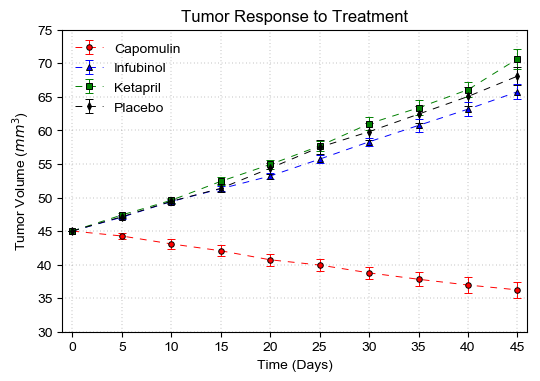

In [87]:
import matplotlib as mpl

# Generate the Plot (with Error Bars)
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
Drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = Tumor_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, Tumor_mean[drug], yerr=Tumor_Stand[drug], linestyle='--', linewidth=0.7, dashes=(7, 7), 
                 color=colors[i], capsize=3, marker=markers[i], markersize=4, markerfacecolor=colors[i], 
                 markeredgecolor='k', markeredgewidth=0.7, capthick=0.7)
    
#label x and y..amn title--et ajouter le titre.
plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((30, 75))


plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume ($mm^3$)')
plt.title('Tumor Response to Treatment')


plt.legend(loc='best', framealpha=0, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.25, color='k')

In [94]:
# Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
New_tumor= data.groupby(['Drug', 'Timepoint'])
metastatic = pd.DataFrame()
metastatic['Standard Error'] = New_tumor['Metastatic Sites'].sem()
metastatic['Metastatic Sites'] = New_tumor['Metastatic Sites'].mean()
metastatic.head()

Standard Error  Metastatic Sites
Drug      Timepoint                                  
Capomulin 0                0.000000          0.000000
          5                0.074833          0.160000
          10               0.125433          0.320000
          15               0.132048          0.375000
          20               0.161621          0.652174

In [107]:
metastatic_mean = Tumor['Tumor Volume (mm3)'].unstack(level=0)
metastatic_stand = metastatic['Standard Error'].unstack(level=0)
metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334


In [110]:
metastatic_mean = metastatic['Metastatic Sites'].unstack(level=0)
metastatic_stand = metastatic['Standard Error'].unstack(level=0)
metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


Text(0.5,1,'Metastatic Spread During Treatment')

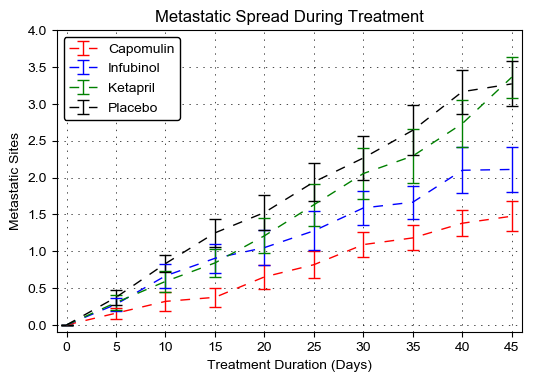

In [124]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = metastatic_mean.index
for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, metastatic_mean[drug], yerr=metastatic_stand[drug], linestyle='--', linewidth=1, 
                 dashes=(7, 7), color=colors[i], capsize=4, markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=1, capthick=0)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((-0.1, 4))
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')

In [126]:
# Survival Rates
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
New_tumor= data.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
survival_rate = pd.DataFrame()
# Preview DataFrame
survival_rate['Mouse Count'] = New_tumor['Mouse ID'].count()
survival_rate.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [141]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
survival_rate_count = survival['Mouse Count'].unstack(level=0)
survival_rate_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17


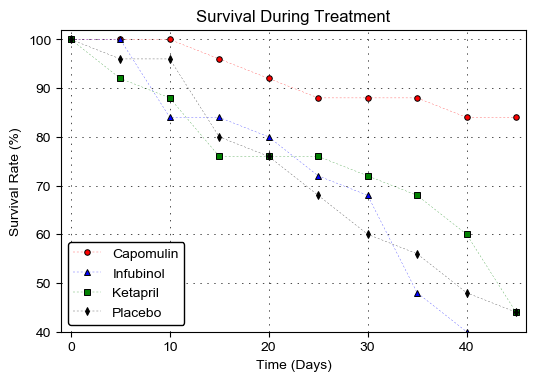

In [147]:
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = survival_count.index
for i in range(len(drugs)):
    drug = drugs[i]
    survival_rate = survival_count[drug] / survival_count.loc[0, drug] * 100
    plt.errorbar(x, survival_rate, linestyle='--', linewidth=0.2, 
                 dashes=(7, 7), color=colors[i], marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor='k', markeredgewidth=0.7)

#label   

plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')



plt.xticks(range(0,46,10))    
plt.xlim((-1, 46))
plt.ylim((40, 102))
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')
plt.legend(loc='best', framealpha=1, edgecolor='k')

In [172]:
# Summary Bar Graph
# Calculate the percent changes for each drug

New_tumor = data.groupby(['Drug', 'Timepoint'])
tumor_percent = pd.DataFrame()


tumor_percent[' Tumor Volume'] = New_tumor['Tumor Volume (mm3)'].mean()
tumor_percent = tumor_percent.unstack(level=-1)
tumor_percent.columns = tumor_percent.columns.droplevel(level=0)



tumor_percent['% Tumor Volume Change'] = (tumor_percent[45] - tumor_percent[0]) / tumor_percent[0] * 100
tumor_percent = tumor_change[['% Tumor Volume Change']]

# Display the data to confirm
tumor_percent.head(10)


Timepoint,% Tumor Volume Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


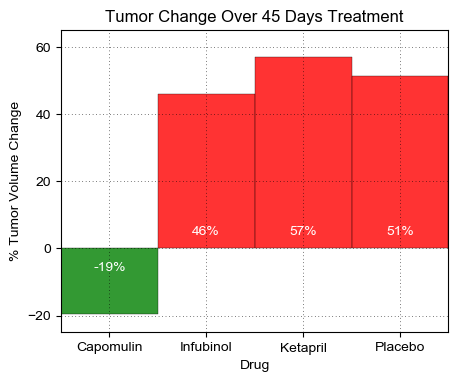

In [176]:
# Store 
Drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

# DEFIne color based on percent(if)
Colors = ['r' if (tumor_change.loc[drug]>0).values[0] else 'g' for drug in drugs]

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc.
ax = tumor_change.loc[drugs].plot(kind='bar', color=[tuple(colors)], rot=0, legend=False, alpha=0.8,
                            edgecolor = 'k', linewidth=0.3, width=1, figsize=(5,4))

plt.xlim((-0.5, 3.5))
plt.ylim((-25, 65))
plt.yticks(range(-20,70,20))
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='k')



plt.title('Tumor Change Over 45 Days Treatment')
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Drug')




# Use functions to label the percentages of changes
posx = range(len(drugs))
posy = [3 if (tumor_change.loc[drug]>0).values[0] else -4 for drug in drugs]
va = ['bottom' if (tumor_change.loc[drug]>0).values[0] else 'top' for drug in drugs]
labels = tumor_change.loc[drugs].values

for i in range(len(drugs)):
    ax.text(posx[i], posy[i], '%1.0d%%' % int(labels[i]), ha='center', va=va[i], color='w')
    
